# Diseases correlation with phenotypes 15/03/2022

Diseases data-Fields used: 
- Medical conditions: 2976Age diabetes diagnosed, 3627Age angina diagnosed, 3894Age heart attack diagnosed, 4012Age deep-vein thrombosis (DVT, blood clot in leg) diagnosed, 4056Age stroke diagnosed

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [177]:
def histogram(value, title):
    plt.figure()
    value.plot.hist(bins=100, rwidth=0.5)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    #mu = value.mean().round(decimals=2)
    #std = value.std().round(decimals=2)
    #plt.savefig(output_dir + title + ".png")

In [178]:
df_diseases = pd.read_csv("/NVME/decrypted/ukbb/labels/1_data_extraction/ukb34181.csv", sep=',')
df_eye_diseases = pd.read_csv("/NVME/decrypted/ukbb/labels/6_data_extraction/ukb49907.csv", sep=',')
df_phenos_ARIA = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/2021-12-28_ARIA_phenotypes.csv", sep=',')
df_pheno_bif = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/2022-02-04_bifurcations.csv", sep=',')
df_pheno_tVA = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/2022-02-13_tVA_phenotypes.csv", sep=',')
df_pheno_tAA = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/2022-02-14_tAA_phenotypes.csv", sep=',')
df_pheno_greenpixels = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/2022-02-01_N_green_pixels.csv", sep=',')
df_pheno_greensegments = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/2022-02-21_N_green_segments_phenotypes.csv", sep=',')

In [ ]:
df_eye_diseases = df_eye_diseases[['eid', '6148-0.0','6148-0.1','6148-0.2', '6148-0.3', '6148-0.4', 
             '6148-1.0','6148-1.1','6148-1.2', '6148-1.3', '6148-1.4',
             '6148-2.0','6148-2.1','6148-2.2', '6148-2.3', '6148-2.4',
             '6148-3.0','6148-3.1','6148-3.2', '6148-3.3', '6148-3.4']]

In [224]:

df_diseases = df_diseases[['eid', '2976-0.0', '2976-1.0', '2976-2.0', 
                           '3627-0.0', '3627-1.0','3627-2.0',
                           '3894-0.0', '3894-1.0','3894-2.0',
                           '4012-0.0', '4012-1.0', '4012-2.0',
                           '4056-0.0', '4056-1.0','4056-2.0']]
df_diseases.head(2)

,eid,2976-0.0,2976-1.0,2976-2.0,3627-0.0,3627-1.0,3627-2.0,3894-0.0,3894-1.0,3894-2.0,4012-0.0,4012-1.0,4012-2.0,4056-0.0,4056-1.0,4056-2.0
0,1000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000024,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df_phenos_ARIA = df_phenos_ARIA[['Unnamed: 0', 'medianDiameter_all', 'medianDiameter_artery', 'medianDiameter_vein', 
            'DF_all', 'DF_artery', 'DF_vein']]
df_phenos_ARIA.columns = ['image', 'medianDiameter_all', 'medianDiameter_artery', 'medianDiameter_vein', 
            'DF_all', 'DF_artery', 'DF_vein']

df_phenos_ARIA['DF_ratio']= df_phenos_ARIA['DF_artery']/df_phenos_ARIA['DF_vein']
df_phenos_ARIA['medianDiameter_ratio']= df_phenos_ARIA['medianDiameter_artery']/df_phenos_ARIA['medianDiameter_vein']

In [180]:
df_pheno_bif.columns = ['image', 'N_bif']
df_pheno_tVA.columns = ['image', 'tVA']
df_pheno_tAA.columns = ['image', 'tAA']
df_pheno_greenpixels.columns = ['image', 'N_green']
df_pheno_greensegments.columns = ['image', 'N_green_segments']

In [226]:
#df_diseases.columns

In [229]:

df_diseases_modified = pd.DataFrame([])
df_diseases_simplified = pd.DataFrame([])

df_diseases_modified = np.where(df_diseases.isnull(), 0, 1).copy()


df_diseases_modified = pd.DataFrame(df_diseases_modified,
                 columns=['match_eid', '2976-0.0', '2976-1.0', '2976-2.0', '3627-0.0', '3627-1.0',
       '3627-2.0', '3894-0.0', '3894-1.0', '3894-2.0', '4012-0.0', '4012-1.0',
       '4012-2.0', '4056-0.0', '4056-1.0', '4056-2.0'])


df_diseases_simplified['eid'] = df_diseases['eid'].copy()
df_diseases_simplified['diabetes'] = df_diseases_modified['2976-0.0'] + df_diseases_modified['2976-1.0'] + df_diseases_modified['2976-2.0']
df_diseases_simplified['angina'] = df_diseases_modified['3627-0.0'] + df_diseases_modified['3627-1.0'] + df_diseases_modified['3627-2.0']
df_diseases_simplified['heart_attack'] = df_diseases_modified['3894-0.0'] + df_diseases_modified['3894-1.0'] + df_diseases_modified['3894-2.0']
df_diseases_simplified['deepVeinThrombosis'] = df_diseases_modified['4012-0.0'] + df_diseases_modified['4012-1.0'] + df_diseases_modified['4012-2.0']
df_diseases_simplified['stroke'] = df_diseases_modified['4056-0.0'] + df_diseases_modified['4056-1.0'] + df_diseases_modified['4056-2.0']


df_diseases_simplified.head(2)

#df_diseases_simplified['diabetes'] = np.where(df_diseases['2976-0.0'].isnull(), 0, 1).copy()
#df_diseases_simplified['angina'] = np.where(df_diseases['3627-0.0'].isnull(), 0, 1).copy()
#df_diseases_simplified['heart_attack'] = np.where(df_diseases['3894-0.0'].isnull(), 0, 1).copy()
#df_diseases_simplified['deepVeinThrombosis'] = np.where(df_diseases['4012-0.0'].isnull(), 0, 1).copy()
#df_diseases_simplified['stroke'] = np.where(df_diseases['4056-0.0'].isnull(), 0, 1).copy()


,eid,diabetes,angina,heart_attack,deepVeinThrombosis,stroke
0,1000013,0,0,0,0,0
1,1000024,1,0,0,0,0


In [243]:
df_galucoma = df_eye_diseases[(df_eye_diseases['6148-0.0'] == 2.0) | (df_eye_diseases['6148-0.1'] == 2.0) | 
    (df_eye_diseases['6148-0.2'] == 2.0) | (df_eye_diseases['6148-0.3'] == 2.0) | (df_eye_diseases['6148-0.4'] == 2.0) | 
    (df_eye_diseases['6148-1.0'] == 2.0) | (df_eye_diseases['6148-1.1'] == 2.0) | (df_eye_diseases['6148-1.2'] == 2.0) |
    (df_eye_diseases['6148-1.3'] == 2.0) | (df_eye_diseases['6148-1.4'] == 2.0) | (df_eye_diseases['6148-2.0'] == 2.0) |
    (df_eye_diseases['6148-2.1'] == 2.0) | (df_eye_diseases['6148-2.2'] == 2.0) | (df_eye_diseases['6148-2.3'] == 2.0) |
    (df_eye_diseases['6148-2.4'] == 2.0) | (df_eye_diseases['6148-3.0'] == 2.0) | (df_eye_diseases['6148-3.1'] == 2.0) |
    (df_eye_diseases['6148-3.2'] == 2.0) | (df_eye_diseases['6148-3.3'] == 2.0) | (df_eye_diseases['6148-3.4'] == 2.0)]
df_galucoma['glaucoma']= 1
df_galucoma= df_galucoma[['eid','glaucoma']].copy()

df_maculadeg = df_eye_diseases[(df_eye_diseases['6148-0.0'] == 5.0) | (df_eye_diseases['6148-0.1'] == 5.0) | 
    (df_eye_diseases['6148-0.2'] == 5.0) | (df_eye_diseases['6148-0.3'] == 5.0) | (df_eye_diseases['6148-0.4'] == 5.0) | 
    (df_eye_diseases['6148-1.0'] == 5.0) | (df_eye_diseases['6148-1.1'] == 5.0) | (df_eye_diseases['6148-1.2'] == 5.0) |
    (df_eye_diseases['6148-1.3'] == 5.0) | (df_eye_diseases['6148-1.4'] == 5.0) | (df_eye_diseases['6148-2.0'] == 5.0) |
    (df_eye_diseases['6148-2.1'] == 5.0) | (df_eye_diseases['6148-2.2'] == 5.0) | (df_eye_diseases['6148-2.3'] == 5.0) |
    (df_eye_diseases['6148-2.4'] == 5.0) | (df_eye_diseases['6148-3.0'] == 5.0) | (df_eye_diseases['6148-3.1'] == 5.0) |
    (df_eye_diseases['6148-3.2'] == 5.0) | (df_eye_diseases['6148-3.3'] == 5.0) | (df_eye_diseases['6148-3.4'] == 5.0)] 
df_maculadeg['maculadeg']= 1
df_maculadeg= df_maculadeg[['eid','maculadeg']].copy()

df_diabetes = df_eye_diseases[(df_eye_diseases['6148-0.0'] == 1.0) | (df_eye_diseases['6148-0.1'] == 1.0) | 
    (df_eye_diseases['6148-0.2'] == 1.0) | (df_eye_diseases['6148-0.3'] == 1.0) | (df_eye_diseases['6148-0.4'] == 1.0) | 
    (df_eye_diseases['6148-1.0'] == 1.0) | (df_eye_diseases['6148-1.1'] == 1.0) | (df_eye_diseases['6148-1.2'] == 1.0) |
    (df_eye_diseases['6148-1.3'] == 1.0) | (df_eye_diseases['6148-1.4'] == 1.0) | (df_eye_diseases['6148-2.0'] == 1.0) |
    (df_eye_diseases['6148-2.1'] == 1.0) | (df_eye_diseases['6148-2.2'] == 1.0) | (df_eye_diseases['6148-2.3'] == 1.0) |
    (df_eye_diseases['6148-2.4'] == 1.0) | (df_eye_diseases['6148-3.0'] == 1.0) | (df_eye_diseases['6148-3.1'] == 1.0) |
    (df_eye_diseases['6148-3.2'] == 1.0) | (df_eye_diseases['6148-3.3'] == 1.0) | (df_eye_diseases['6148-3.4'] == 1.0)]
df_diabetes['diabetes']= 1
df_diabetes= df_diabetes[['eid','diabetes']].copy()

df_injury = df_eye_diseases[(df_eye_diseases['6148-0.0'] == 3.0) | (df_eye_diseases['6148-0.1'] == 3.0) | 
    (df_eye_diseases['6148-0.2'] == 3.0) | (df_eye_diseases['6148-0.3'] == 3.0) | (df_eye_diseases['6148-0.4'] == 3.0) | 
    (df_eye_diseases['6148-1.0'] == 3.0) | (df_eye_diseases['6148-1.1'] == 3.0) | (df_eye_diseases['6148-1.2'] == 3.0) |
    (df_eye_diseases['6148-1.3'] == 3.0) | (df_eye_diseases['6148-1.4'] == 3.0) | (df_eye_diseases['6148-2.0'] == 3.0) |
    (df_eye_diseases['6148-2.1'] == 3.0) | (df_eye_diseases['6148-2.2'] == 3.0) | (df_eye_diseases['6148-2.3'] == 3.0) |
    (df_eye_diseases['6148-2.4'] == 3.0) | (df_eye_diseases['6148-3.0'] == 3.0) | (df_eye_diseases['6148-3.1'] == 3.0) |
    (df_eye_diseases['6148-3.2'] == 3.0) | (df_eye_diseases['6148-3.3'] == 3.0) | (df_eye_diseases['6148-3.4'] == 3.0)]
df_injury['injury']= 1
df_injury= df_injury[['eid','injury']].copy()

df_cataratas = df_eye_diseases[(df_eye_diseases['6148-0.0'] == 4.0) | (df_eye_diseases['6148-0.1'] == 4.0) | 
    (df_eye_diseases['6148-0.2'] == 4.0) | (df_eye_diseases['6148-0.3'] == 4.0) | (df_eye_diseases['6148-0.4'] == 4.0) | 
    (df_eye_diseases['6148-1.0'] == 4.0) | (df_eye_diseases['6148-1.1'] == 4.0) | (df_eye_diseases['6148-1.2'] == 4.0) |
    (df_eye_diseases['6148-1.3'] == 4.0) | (df_eye_diseases['6148-1.4'] == 4.0) | (df_eye_diseases['6148-2.0'] == 4.0) |
    (df_eye_diseases['6148-2.1'] == 4.0) | (df_eye_diseases['6148-2.2'] == 4.0) | (df_eye_diseases['6148-2.3'] == 4.0) |
    (df_eye_diseases['6148-2.4'] == 4.0) | (df_eye_diseases['6148-3.0'] == 4.0) | (df_eye_diseases['6148-3.1'] == 4.0) |
    (df_eye_diseases['6148-3.2'] == 4.0) | (df_eye_diseases['6148-3.3'] == 4.0) | (df_eye_diseases['6148-3.4'] == 4.0)]
df_cataratas['cataratas']= 1
df_cataratas= df_cataratas[['eid','cataratas']].copy()

df_other_eye_cond= pd.DataFrame([])
df_other_eye_cond = df_eye_diseases[(df_eye_diseases['6148-0.0'] == 6.0) | (df_eye_diseases['6148-0.1'] == 6.0) | 
    (df_eye_diseases['6148-0.2'] == 6.0) | (df_eye_diseases['6148-0.3'] == 6.0) | (df_eye_diseases['6148-0.4'] == 6.0) | 
    (df_eye_diseases['6148-1.0'] == 6.0) | (df_eye_diseases['6148-1.1'] == 6.0) | (df_eye_diseases['6148-1.2'] == 6.0) |
    (df_eye_diseases['6148-1.3'] == 6.0) | (df_eye_diseases['6148-1.4'] == 6.0) | (df_eye_diseases['6148-2.0'] == 6.0) |
    (df_eye_diseases['6148-2.1'] == 6.0) | (df_eye_diseases['6148-2.2'] == 6.0) | (df_eye_diseases['6148-2.3'] == 6.0) |
    (df_eye_diseases['6148-2.4'] == 6.0) | (df_eye_diseases['6148-3.0'] == 6.0) | (df_eye_diseases['6148-3.1'] == 6.0) |
    (df_eye_diseases['6148-3.2'] == 6.0) | (df_eye_diseases['6148-3.3'] == 6.0) | (df_eye_diseases['6148-3.4'] == 6.0)]
df_other_eye_cond['other_eye_cond']= 1
df_other_eye_cond= df_other_eye_cond[['eid','other_eye_cond']].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [244]:
df_other_eye_cond.head(10)

,eid,other_eye_cond
1,1000024,1
4,1000055,1
192,1001931,1
400,1004014,1
404,1004057,1
434,1004356,1
459,1004604,1
517,1005181,1
648,1006499,1
674,1006750,1


In [249]:
df_final_eye_diseases= pd.DataFrame([])
df_final_eye_diseases = pd.merge(df_aux, df_galucoma, how='left', on='eid')
df_final_eye_diseases = pd.merge(df_final_eye_diseases, df_maculadeg, how='left', on='eid')
df_final_eye_diseases = pd.merge(df_final_eye_diseases, df_diabetes, how='left', on='eid')
df_final_eye_diseases = pd.merge(df_final_eye_diseases, df_injury, how='left', on='eid')
df_final_eye_diseases = pd.merge(df_final_eye_diseases, df_cataratas, how='left', on='eid')
df_final_eye_diseases = pd.merge(df_final_eye_diseases, df_other_eye_cond, how='left', on='eid')
df_final_eye_diseases=df_final_eye_diseases[['eid', 'glaucoma', 'maculadeg', 'diabetes', 'injury', 'cataratas', 'other_eye_cond']]
df_final_eye_diseases.head(5)

,eid,glaucoma,maculadeg,diabetes,injury,cataratas,other_eye_cond
0,1018804,NaN,NaN,NaN,NaN,NaN,NaN
1,1018804,NaN,NaN,NaN,NaN,NaN,NaN
2,1018843,NaN,NaN,NaN,NaN,1.0,1.0
3,1018843,NaN,NaN,NaN,NaN,1.0,1.0
4,1018862,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
final_eye_diseases = np.where(df_final_eye_diseases.isnull(), 0, 1).copy()


final_eye_diseases = pd.DataFrame(final_eye_diseases,
                 columns=['match_eid', 'glaucoma', 'maculadeg', 'diabetes', 'injury', 'cataratas', 'other_eye_cond'])


final_eye_diseases['eid'] = df_final_eye_diseases['eid'].copy()

In [251]:
final_eye_diseases.head(10)

,match_eid,glaucoma,maculadeg,diabetes,injury,cataratas,other_eye_cond,eid
0,1,0,0,0,0,0,0,1018804
1,1,0,0,0,0,0,0,1018804
2,1,0,0,0,0,1,1,1018843
3,1,0,0,0,0,1,1,1018843
4,1,0,0,0,0,0,0,1018862
5,1,0,0,0,0,0,0,1018862
6,1,0,0,0,0,0,0,1018901
7,1,0,0,0,0,0,0,1018901
8,1,0,0,0,0,0,0,1018948
9,1,0,0,0,0,0,0,1018948


In [252]:
directory_save = "/SSD/home/sofia/Codigos_auxiliares"
directory_images = "/NVME/decrypted/ukbb/fundus/raw/CLRIS"
directory_images_lwnet = "/NVME/decrypted/ukbb/fundus/lwnet"

df_QC = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/ageCorrected_ventiles5.txt", sep=',', header=None)
df_QC.columns = ['image']

### From eid to image name:

In [253]:
df_QC['eid'] = df_QC['image'] 

In [254]:
df_aux = pd.DataFrame([])
df_aux= df_QC['eid'].str.split('_', expand=True)
df_aux.columns = ['eid', 'eye', 'date', 'instance']
df_aux['image'] = df_QC['image'] 

### Column from object to int:

In [255]:
df_aux= df_aux.astype({"eid": int})
df_aux.head(5)

,eid,eye,date,instance,image
0,1018804,21015,0,0.png,1018804_21015_0_0.png
1,1018804,21016,0,0.png,1018804_21016_0_0.png
2,1018843,21015,1,0.png,1018843_21015_1_0.png
3,1018843,21016,1,0.png,1018843_21016_1_0.png
4,1018862,21015,0,0.png,1018862_21015_0_0.png


### After QC:

In [259]:
df_after_QC = pd.merge(df_aux, df_diseases_simplified, how='left', on='eid')
df_after_QC = pd.merge(df_after_QC, final_eye_diseases, how='left', on='eid')
df_after_QC = pd.merge(df_after_QC, df_phenos_ARIA, how='left', on='image')
df_after_QC = pd.merge(df_after_QC, df_pheno_bif, how='left', on='image')
df_after_QC = pd.merge(df_after_QC, df_pheno_tVA, how='left', on='image')
df_after_QC = pd.merge(df_after_QC, df_pheno_tAA, how='left', on='image')
df_after_QC = pd.merge(df_after_QC, df_pheno_greenpixels, how='left', on='image')
df_after_QC = pd.merge(df_after_QC, df_pheno_greensegments, how='left', on='image')


print(len(df_diseases_simplified), len(df_aux), len(df_after_QC))

502527 128971 253653


In [260]:
df_after_QC.head(5)

,eid,eye,date,instance,image,diabetes_x,angina,heart_attack,deepVeinThrombosis,stroke,...,DF_all,DF_artery,DF_vein,DF_ratio,medianDiameter_ratio,N_bif,tVA,tAA,N_green,N_green_segments
0,1018804,21015,0,0.png,1018804_21015_0_0.png,0,0,0,0,0,...,1.0193,1.01270,1.02805,0.985069,1.156430,56.0,149.800000,128.000000,1333.0,42.0
1,1018804,21015,0,0.png,1018804_21015_0_0.png,0,0,0,0,0,...,1.0193,1.01270,1.02805,0.985069,1.156430,56.0,149.800000,128.000000,1333.0,42.0
2,1018804,21016,0,0.png,1018804_21016_0_0.png,0,0,0,0,0,...,1.0220,1.01185,1.02255,0.989536,1.128076,57.0,148.666667,NaN,1995.0,50.0
3,1018804,21016,0,0.png,1018804_21016_0_0.png,0,0,0,0,0,...,1.0220,1.01185,1.02255,0.989536,1.128076,57.0,148.666667,NaN,1995.0,50.0
4,1018843,21015,1,0.png,1018843_21015_1_0.png,0,0,0,0,0,...,1.0190,1.01485,1.01910,0.995830,1.257027,42.0,153.500000,142.833333,1220.0,43.0


### Correlation

In [261]:
import seaborn as sns

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.pyplot.gca()
    ax.annotate(label, xy=(0.2, 0.95), size=20, xycoords=ax.transAxes)

<AxesSubplot:>

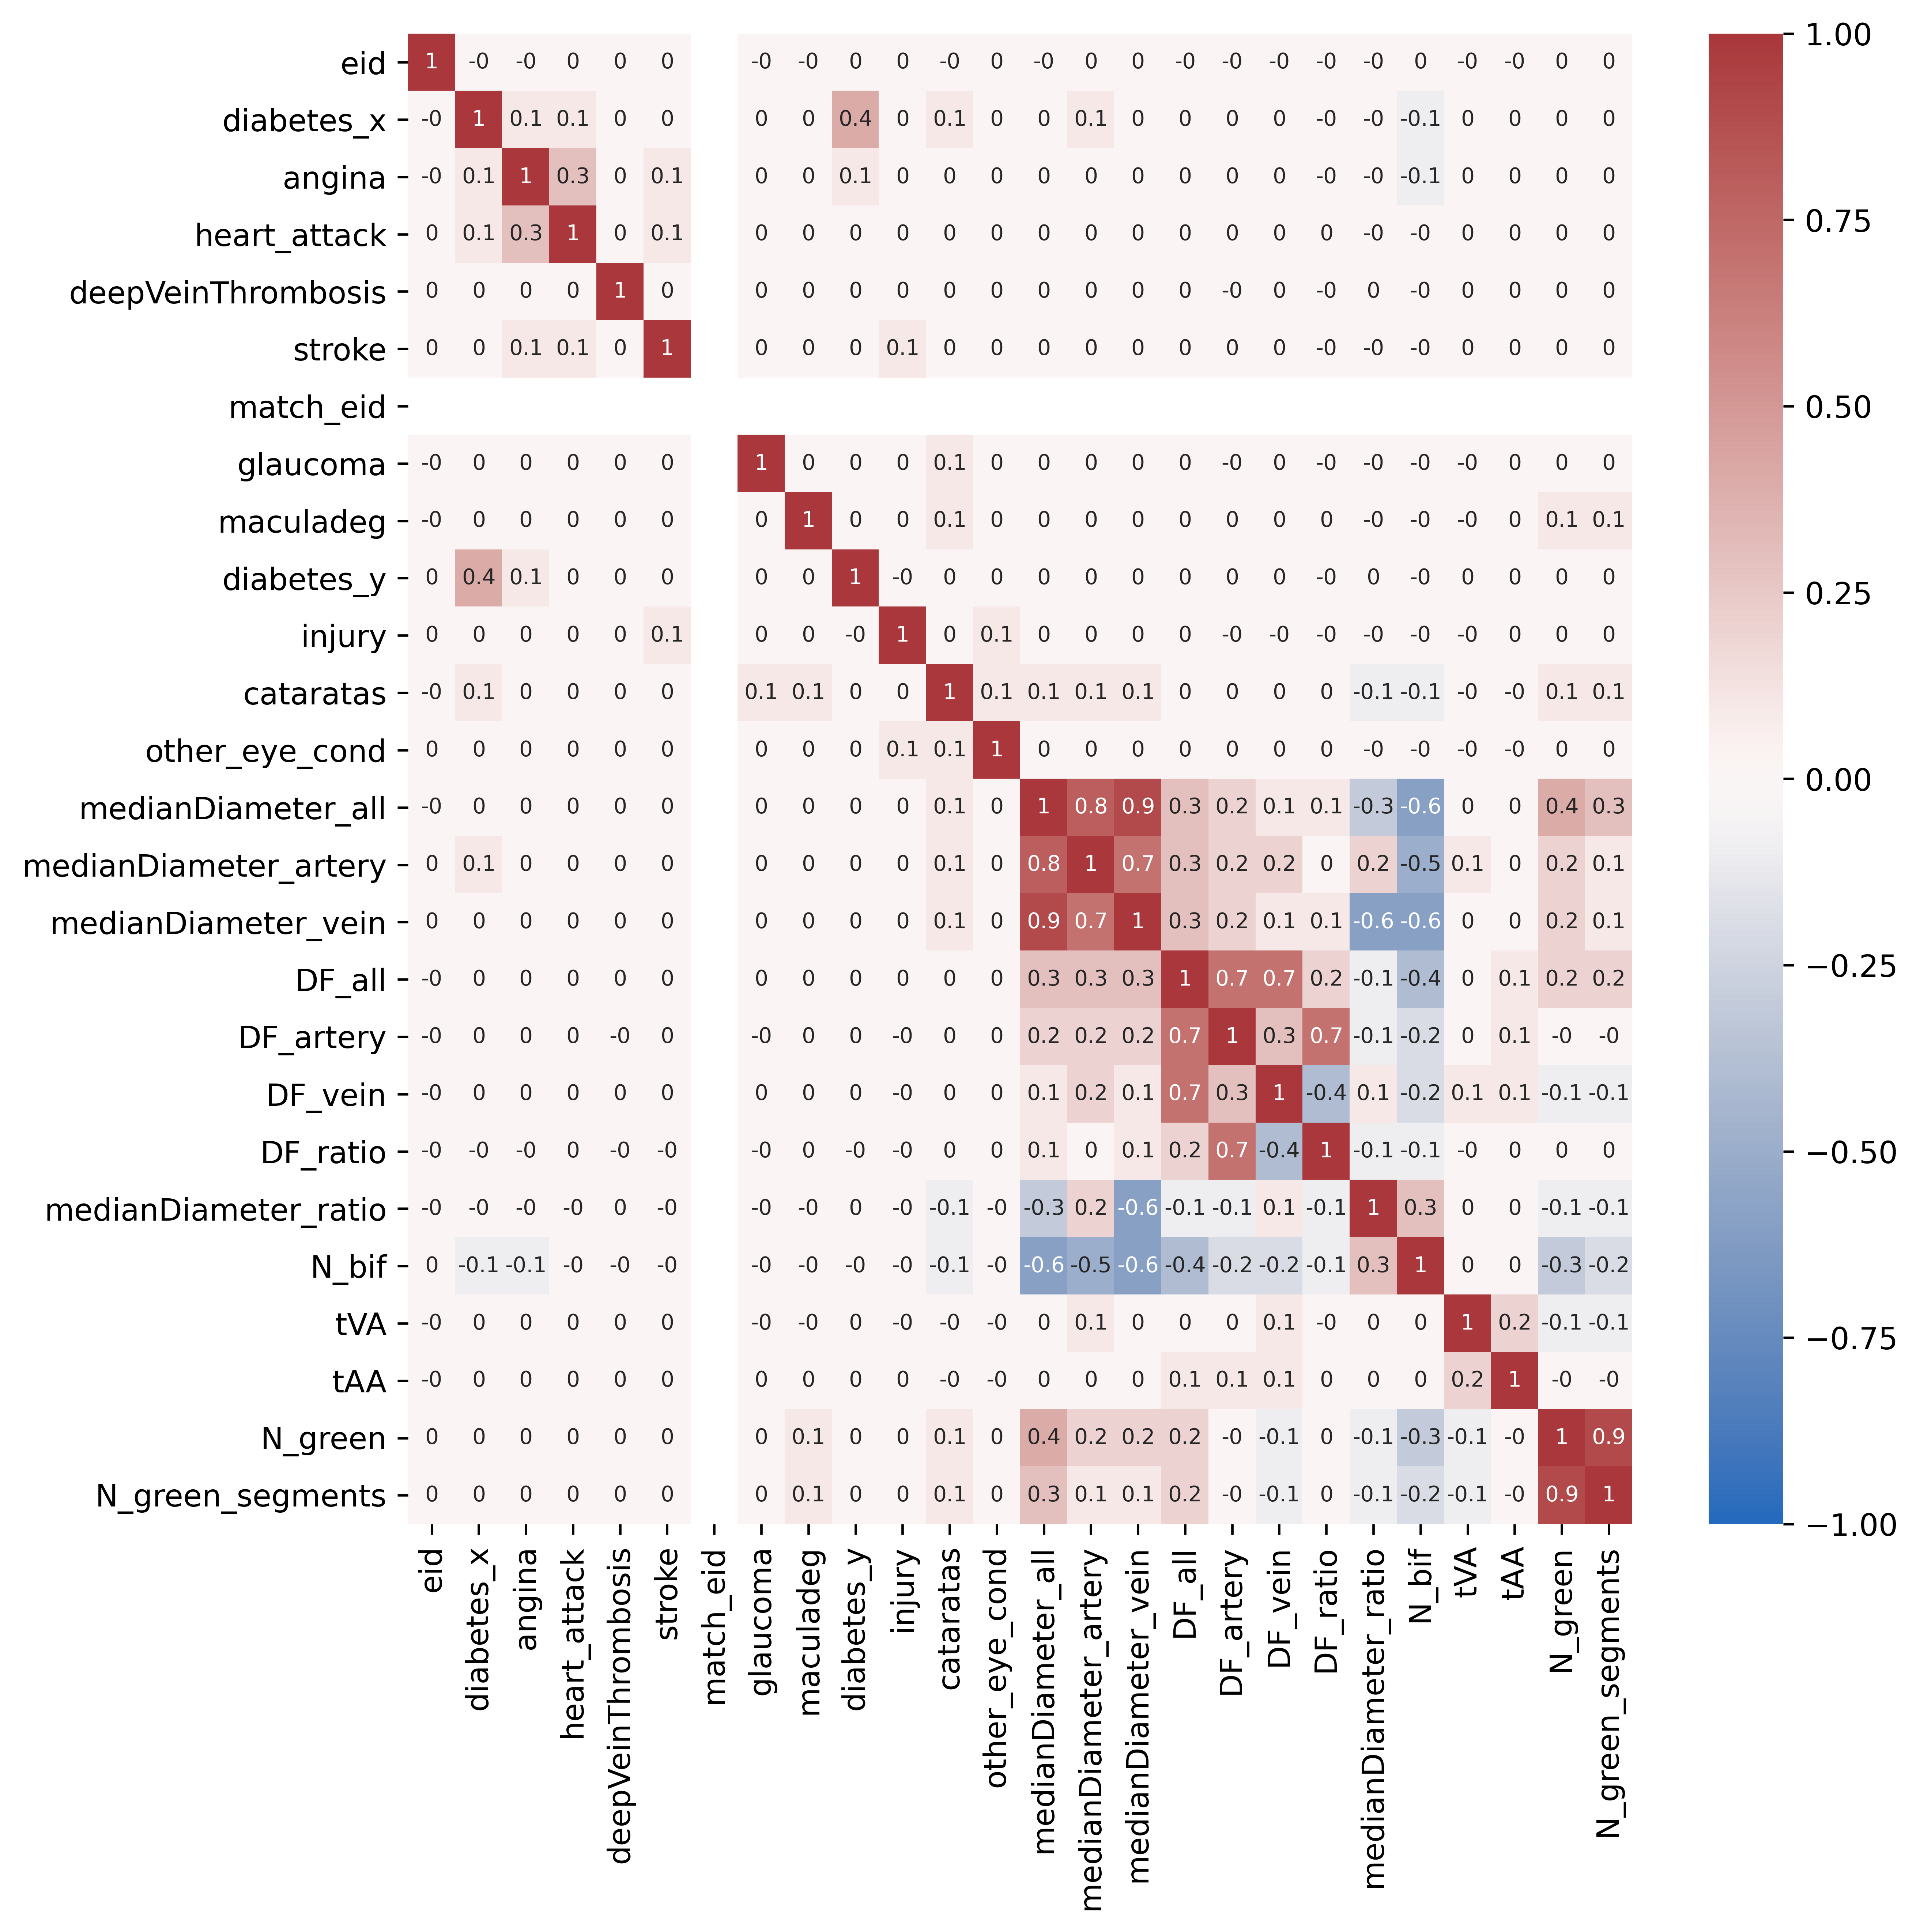

In [273]:
matrix_total = df_after_QC.corr().round(1)
plt.figure(figsize=(9, 9), 
           dpi = 600) 
sns.heatmap(matrix_total, annot=True, vmax=1, vmin=-1, center=0, annot_kws={'size': 7}, cmap='vlag')

<AxesSubplot:>

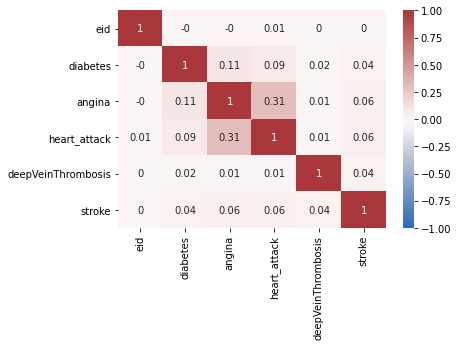

In [217]:
df_after_QC_diseases = df_after_QC[['eid','diabetes', 'angina', 'heart_attack', 'deepVeinThrombosis', 'stroke']]
df_after_QC_phenos = df_after_QC[['eid','medianDiameter_all', 'medianDiameter_artery', 'medianDiameter_vein', 
                                 'DF_all', 'DF_artery', 'DF_vein', 'DF_ratio', 'medianDiameter_ratio']]
#print(df_after_QC_diseases.corr().round(2))
matrix_diseases = df_after_QC_diseases.corr().round(2)
sns.heatmap(matrix_diseases, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')


<AxesSubplot:>

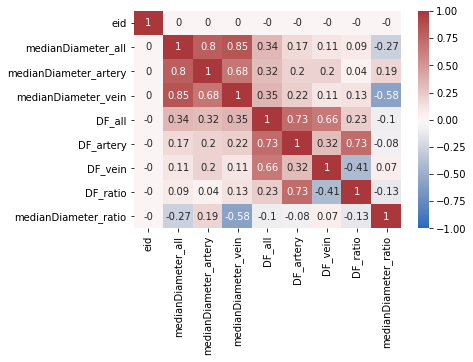

In [218]:
matrix_phenos = df_after_QC_phenos.corr().round(2)
sns.heatmap(matrix_phenos, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

#print(df_after_QC_phenos.corrwith(df_after_QC_diseases, axis = 0))